In [15]:
import h5py
import numpy as np

with h5py.File('image_data_with_labels.h5', 'r') as hf:
    X = np.array(hf['image_data'])  # Images
    Y = np.array(hf['labels'])      # Labels


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)  
print('Y_test shape:', Y_test.shape)

X_train shape: (1332, 620, 1140, 3)
X_test shape: (333, 620, 1140, 3)
Y_train shape: (1332, 5)
Y_test shape: (333, 5)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam # legacy faster on m2 macs
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

WIDTH, HEIGHT = 570, 310

# Steal somebody else's model as a base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(HEIGHT * 2, WIDTH * 2, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
history = model.fit(X_train, Y_train, epochs=4, batch_size=32, callbacks=early_stopping, validation_split=0.2)

Epoch 1/5
34/34 [==============================] - 123s 4s/step - loss: 1.5307 - accuracy: 0.3427 - val_loss: 1.4886 - val_accuracy: 0.3184
Epoch 2/5
34/34 [==============================] - 131s 4s/step - loss: 1.4626 - accuracy: 0.3512 - val_loss: 1.4560 - val_accuracy: 0.3820
Epoch 3/5
34/34 [==============================] - 115s 3s/step - loss: 1.4463 - accuracy: 0.3577 - val_loss: 1.4393 - val_accuracy: 0.4045
Epoch 4/5
34/34 [==============================] - 114s 3s/step - loss: 1.3988 - accuracy: 0.3972 - val_loss: 1.4136 - val_accuracy: 0.3783
Epoch 5/5
34/34 [==============================] - 116s 3s/step - loss: 1.3847 - accuracy: 0.3822 - val_loss: 1.3720 - val_accuracy: 0.3708


In [ ]:
# Continue training for additional epochs
# additional_history = model.fit(X_train, Y_train, epochs=10, batch_size=32, 
#                                callbacks=[early_stopping], validation_split=0.3)

# for key in history.history.keys():
#     history.history[key].extend(additional_history.history[key])


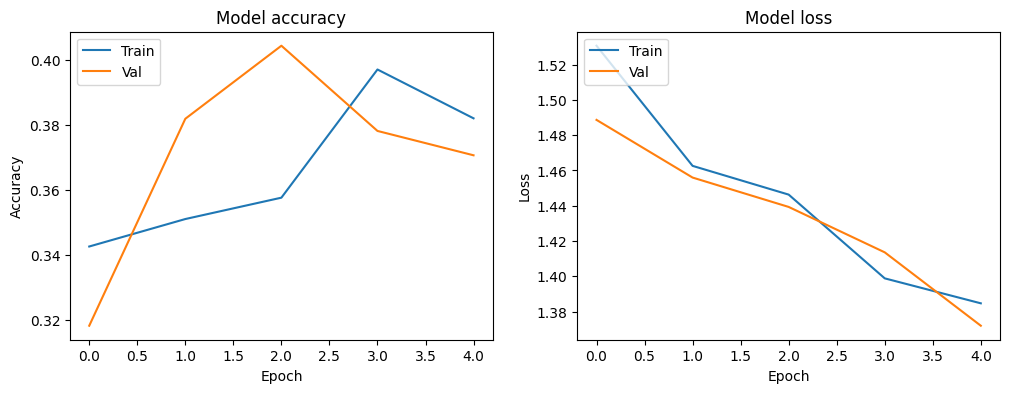

42/42 [==============================] - 114s 3s/step - loss: 1.3337 - accuracy: 0.4039
Train accuracy: 0.40390390157699585
11/11 [==============================] - 27s 2s/step - loss: 1.3687 - accuracy: 0.3784
Val accuracy: 0.37837839126586914


In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

7/7 [==============================] - 18s 2s/step


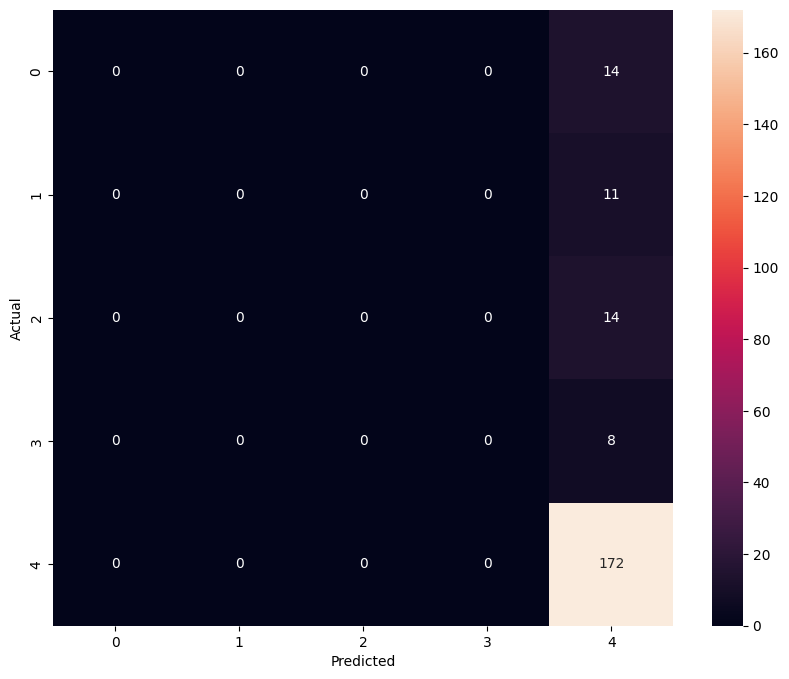

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
model.predict(X_test[:10])

1/1 [==============================] - 1s 796ms/step


array([[0.03486168, 0.05166408, 0.04609677, 0.08721359, 0.7801638 ],
       [0.04525222, 0.08326048, 0.04281701, 0.08048421, 0.74818605],
       [0.04492987, 0.08473868, 0.04222505, 0.07965849, 0.74844784],
       [0.03380125, 0.04398073, 0.07518566, 0.11513988, 0.7318925 ],
       [0.02284802, 0.04613303, 0.03878815, 0.05772783, 0.83450294],
       [0.02711192, 0.04774584, 0.038449  , 0.05628823, 0.83040494],
       [0.03514479, 0.07221559, 0.04044885, 0.07421768, 0.77797306],
       [0.03446777, 0.05583565, 0.04761367, 0.07470713, 0.7873758 ],
       [0.0389959 , 0.07169147, 0.04328439, 0.07873662, 0.76729167],
       [0.03602488, 0.06563158, 0.05304938, 0.08906833, 0.7562259 ]],
      dtype=float32)

In [24]:
model.save('model.keras')


In [17]:
import tensorflow as tf
print(tf.__version__)


2.14.0
